In [1]:
# Data Visualization for "To bee or not to bee"
# IG.2412 & IG.2411

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from PIL import Image
import cv2
from tqdm import tqdm
from skimage import measure, feature, color, morphology

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, silhouette_score
)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from scipy.optimize import minimize
from skimage.transform import rotate

# Configuration des chemins
DATA_DIR = "../train" 
IMAGES_DIR = os.path.join(DATA_DIR, "images")
MASKS_DIR = os.path.join(DATA_DIR, "masks")
EXCEL_FILE = os.path.join(DATA_DIR, "classif.xlsx")

Données chargées: 250 échantillons avec 35 caractéristiques

1. Analyse de la répartition des classes...


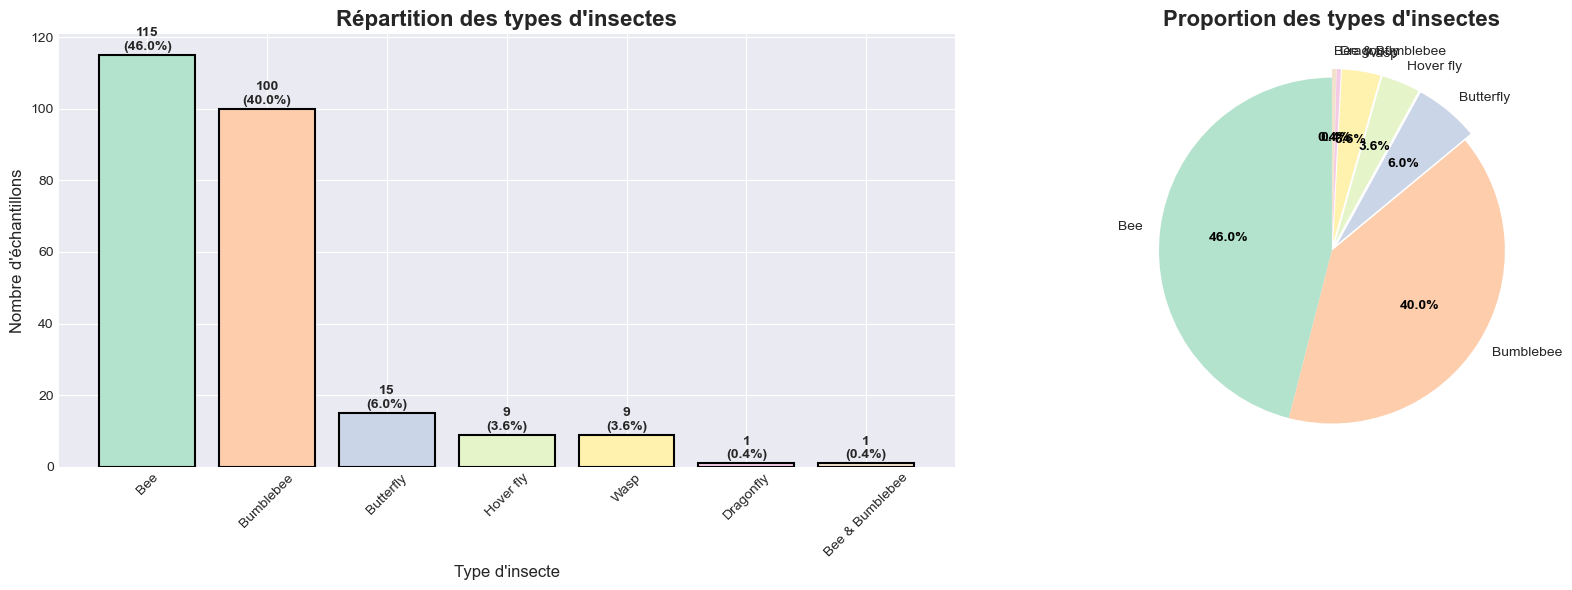

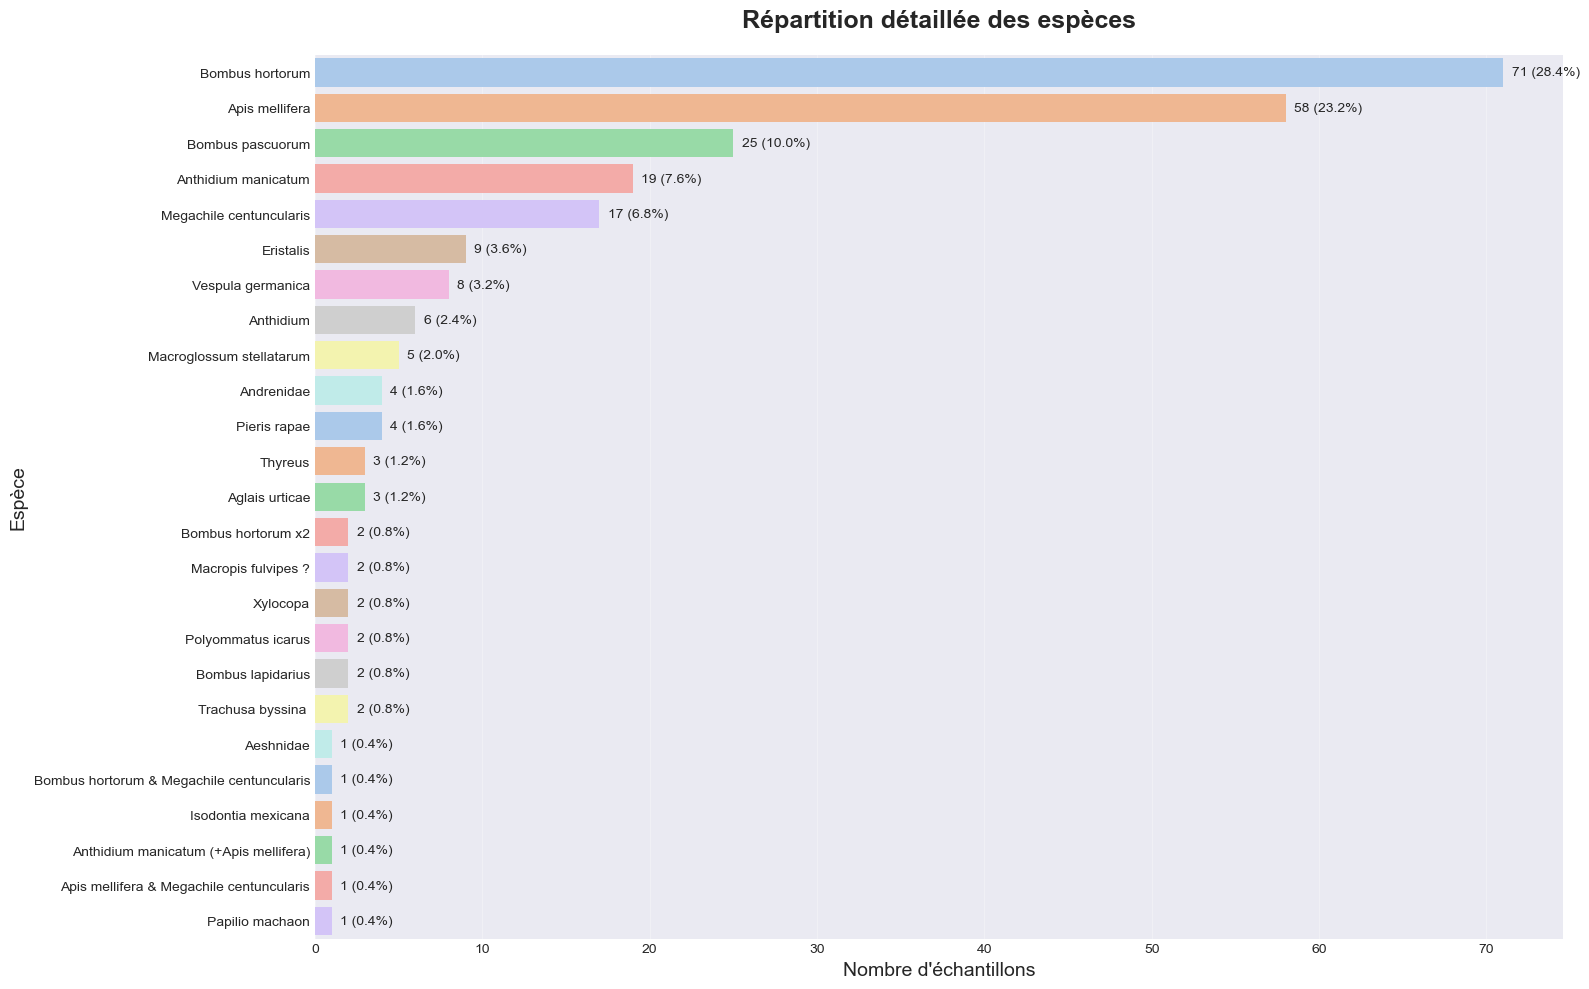


COMMENTAIRE - Répartition des classes:
- Déséquilibre important entre les classes : Bee (46%) et Bumblebee (40%) dominent largement
- Classes minoritaires : Butterfly (6%), Hover fly et Wasp (3.6% chacun)
- Classes très rares : Dragonfly et "Bee & Bumblebee" (0.4% chacun)
→ Ce déséquilibre pourrait affecter les performances des modèles de ML


2. Analyse PCA...


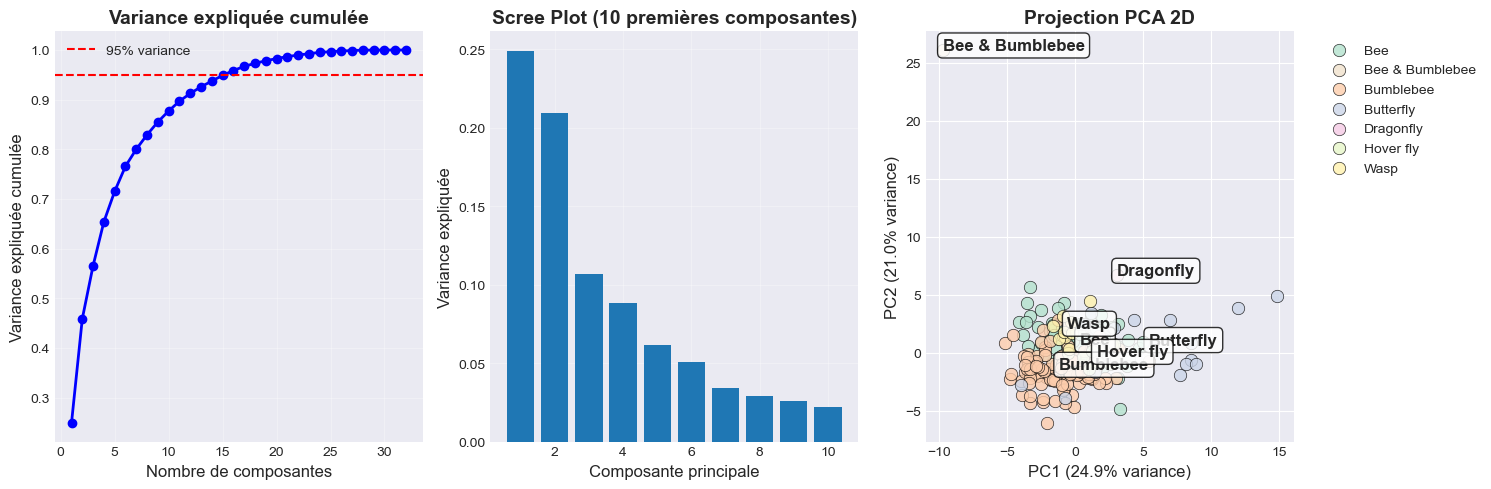


COMMENTAIRE - Analyse PCA:
- Les 2 premières composantes expliquent 45.9% de la variance
- Il faut 16 composantes pour expliquer 95% de la variance
- La projection montre un chevauchement entre Bee et Bumblebee, suggérant des caractéristiques similaires
- Les classes minoritaires (Butterfly, Dragonfly) semblent mieux séparées


3. Analyse des caractéristiques discriminantes...


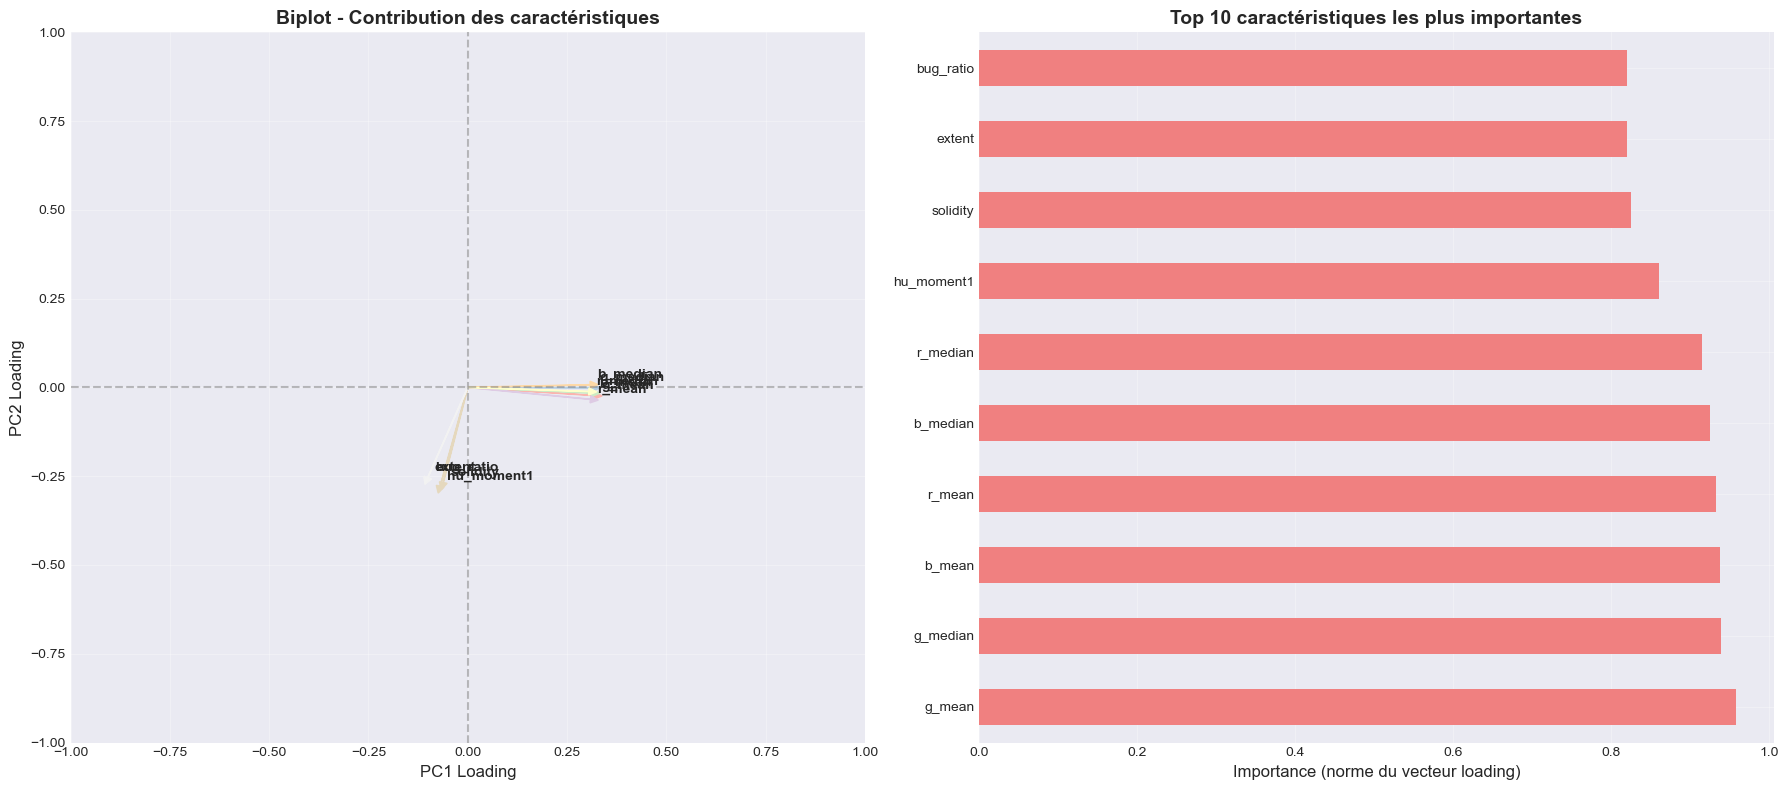


4. Calcul des projections non-linéaires...
Calcul t-SNE...
Calcul UMAP...
Calcul Isomap...


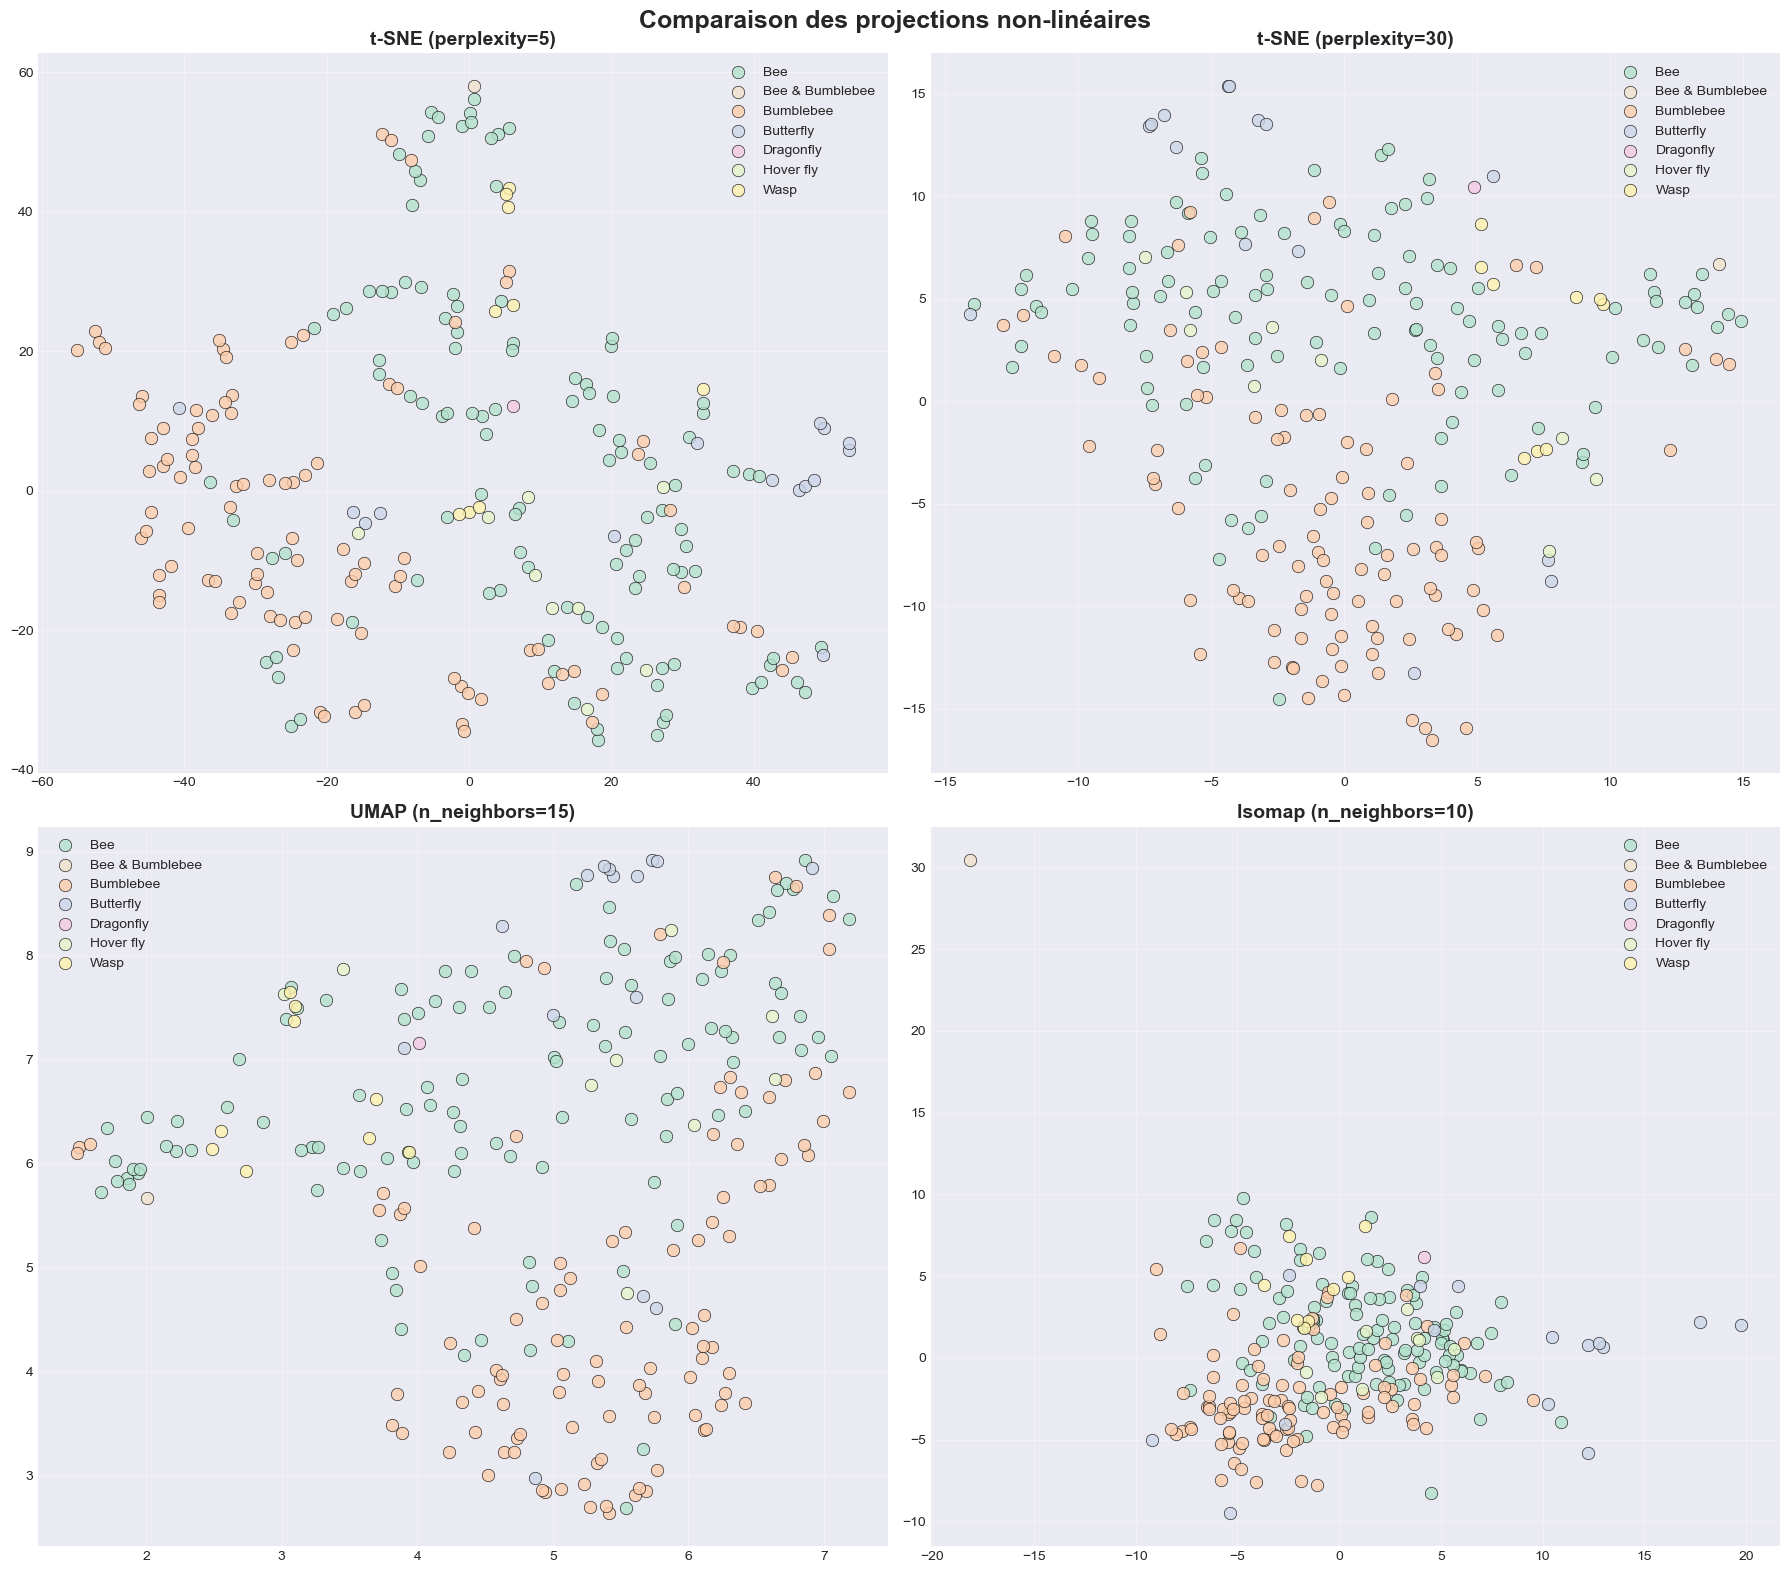


COMMENTAIRE - Projections non-linéaires:
- t-SNE (perplexity=5): Forme des clusters locaux très serrés, risque de sur-segmentation
- t-SNE (perplexity=30): Meilleure vue globale, Bee et Bumblebee forment un continuum
- UMAP: Excellente séparation des classes minoritaires (Butterfly, Dragonfly)
- Isomap: Préserve mieux la structure globale, montre la proximité Bee/Bumblebee
→ Les méthodes non-linéaires confirment la difficulté à séparer Bee et Bumblebee


5. Analyse détaillée des caractéristiques clés...


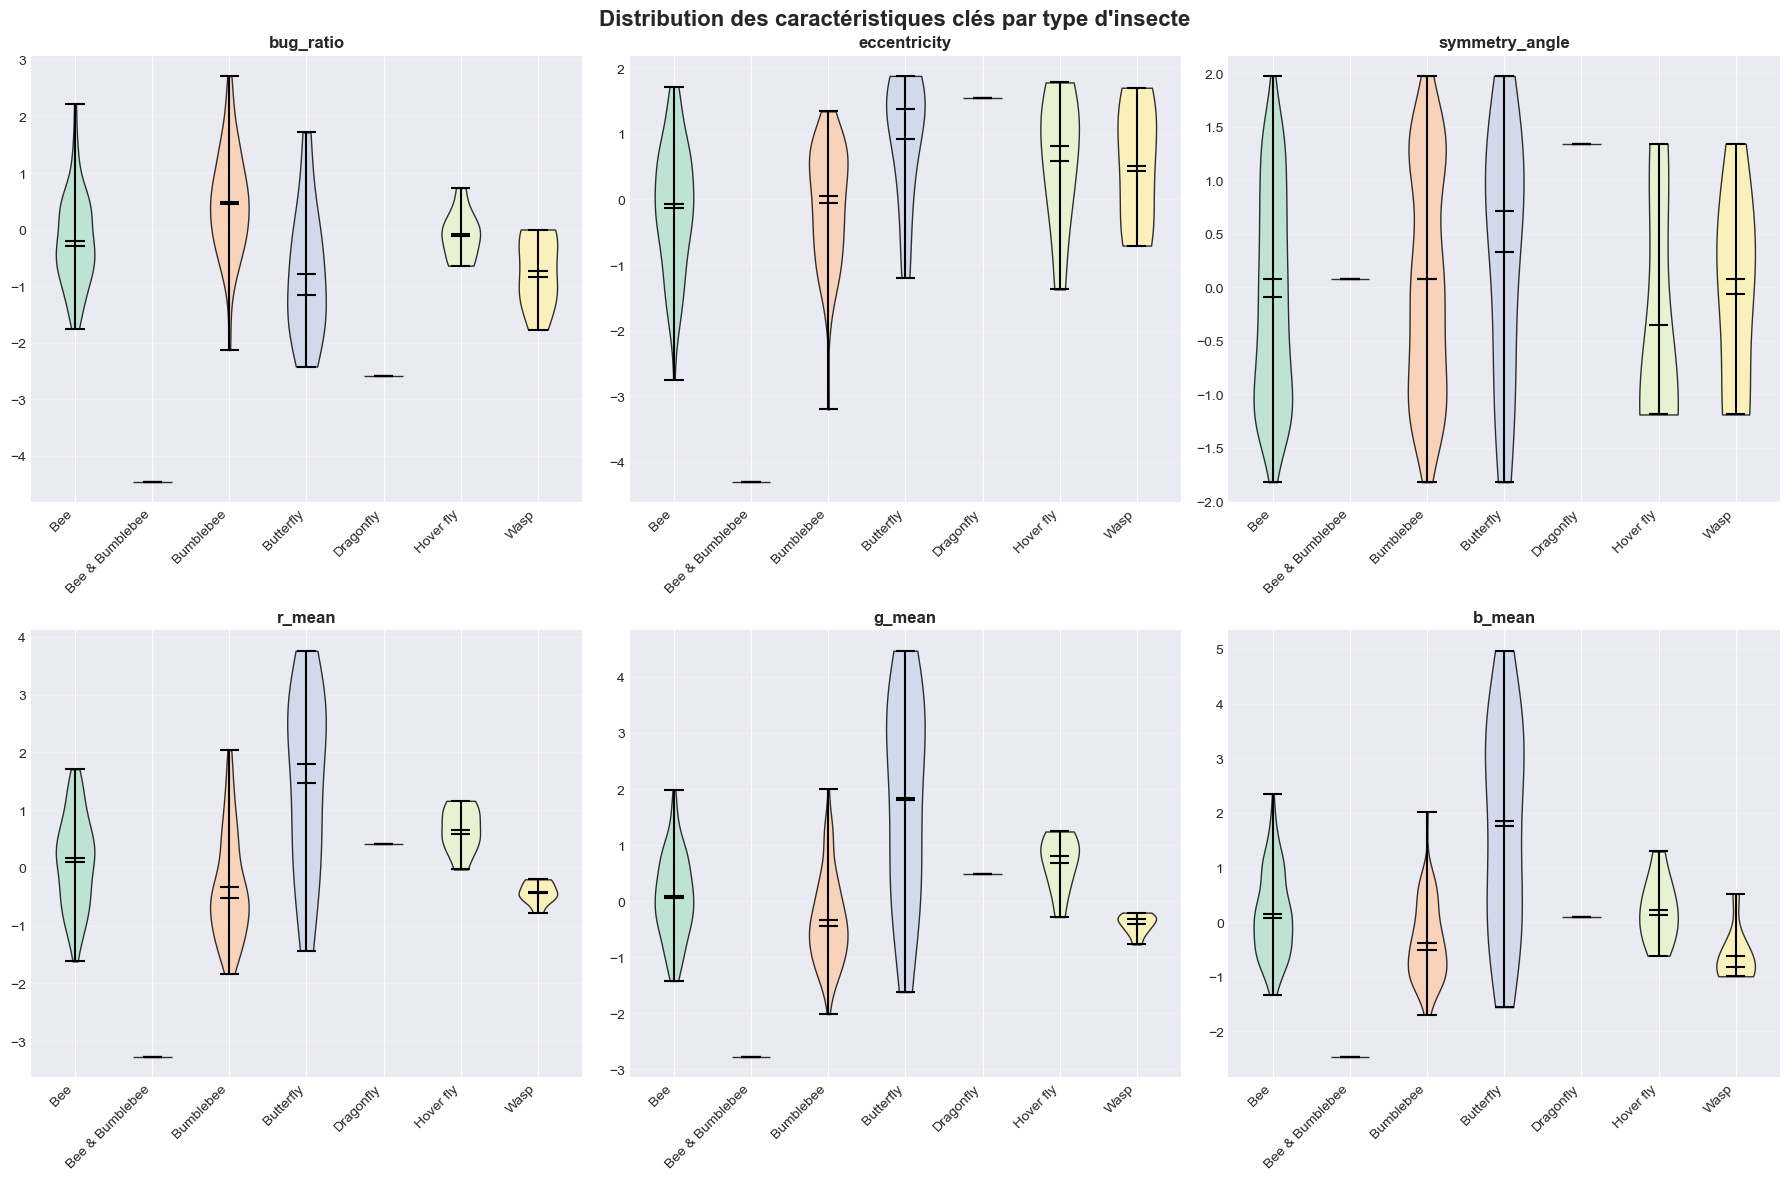


6. Analyse des corrélations...


<Figure size 2000x1600 with 0 Axes>

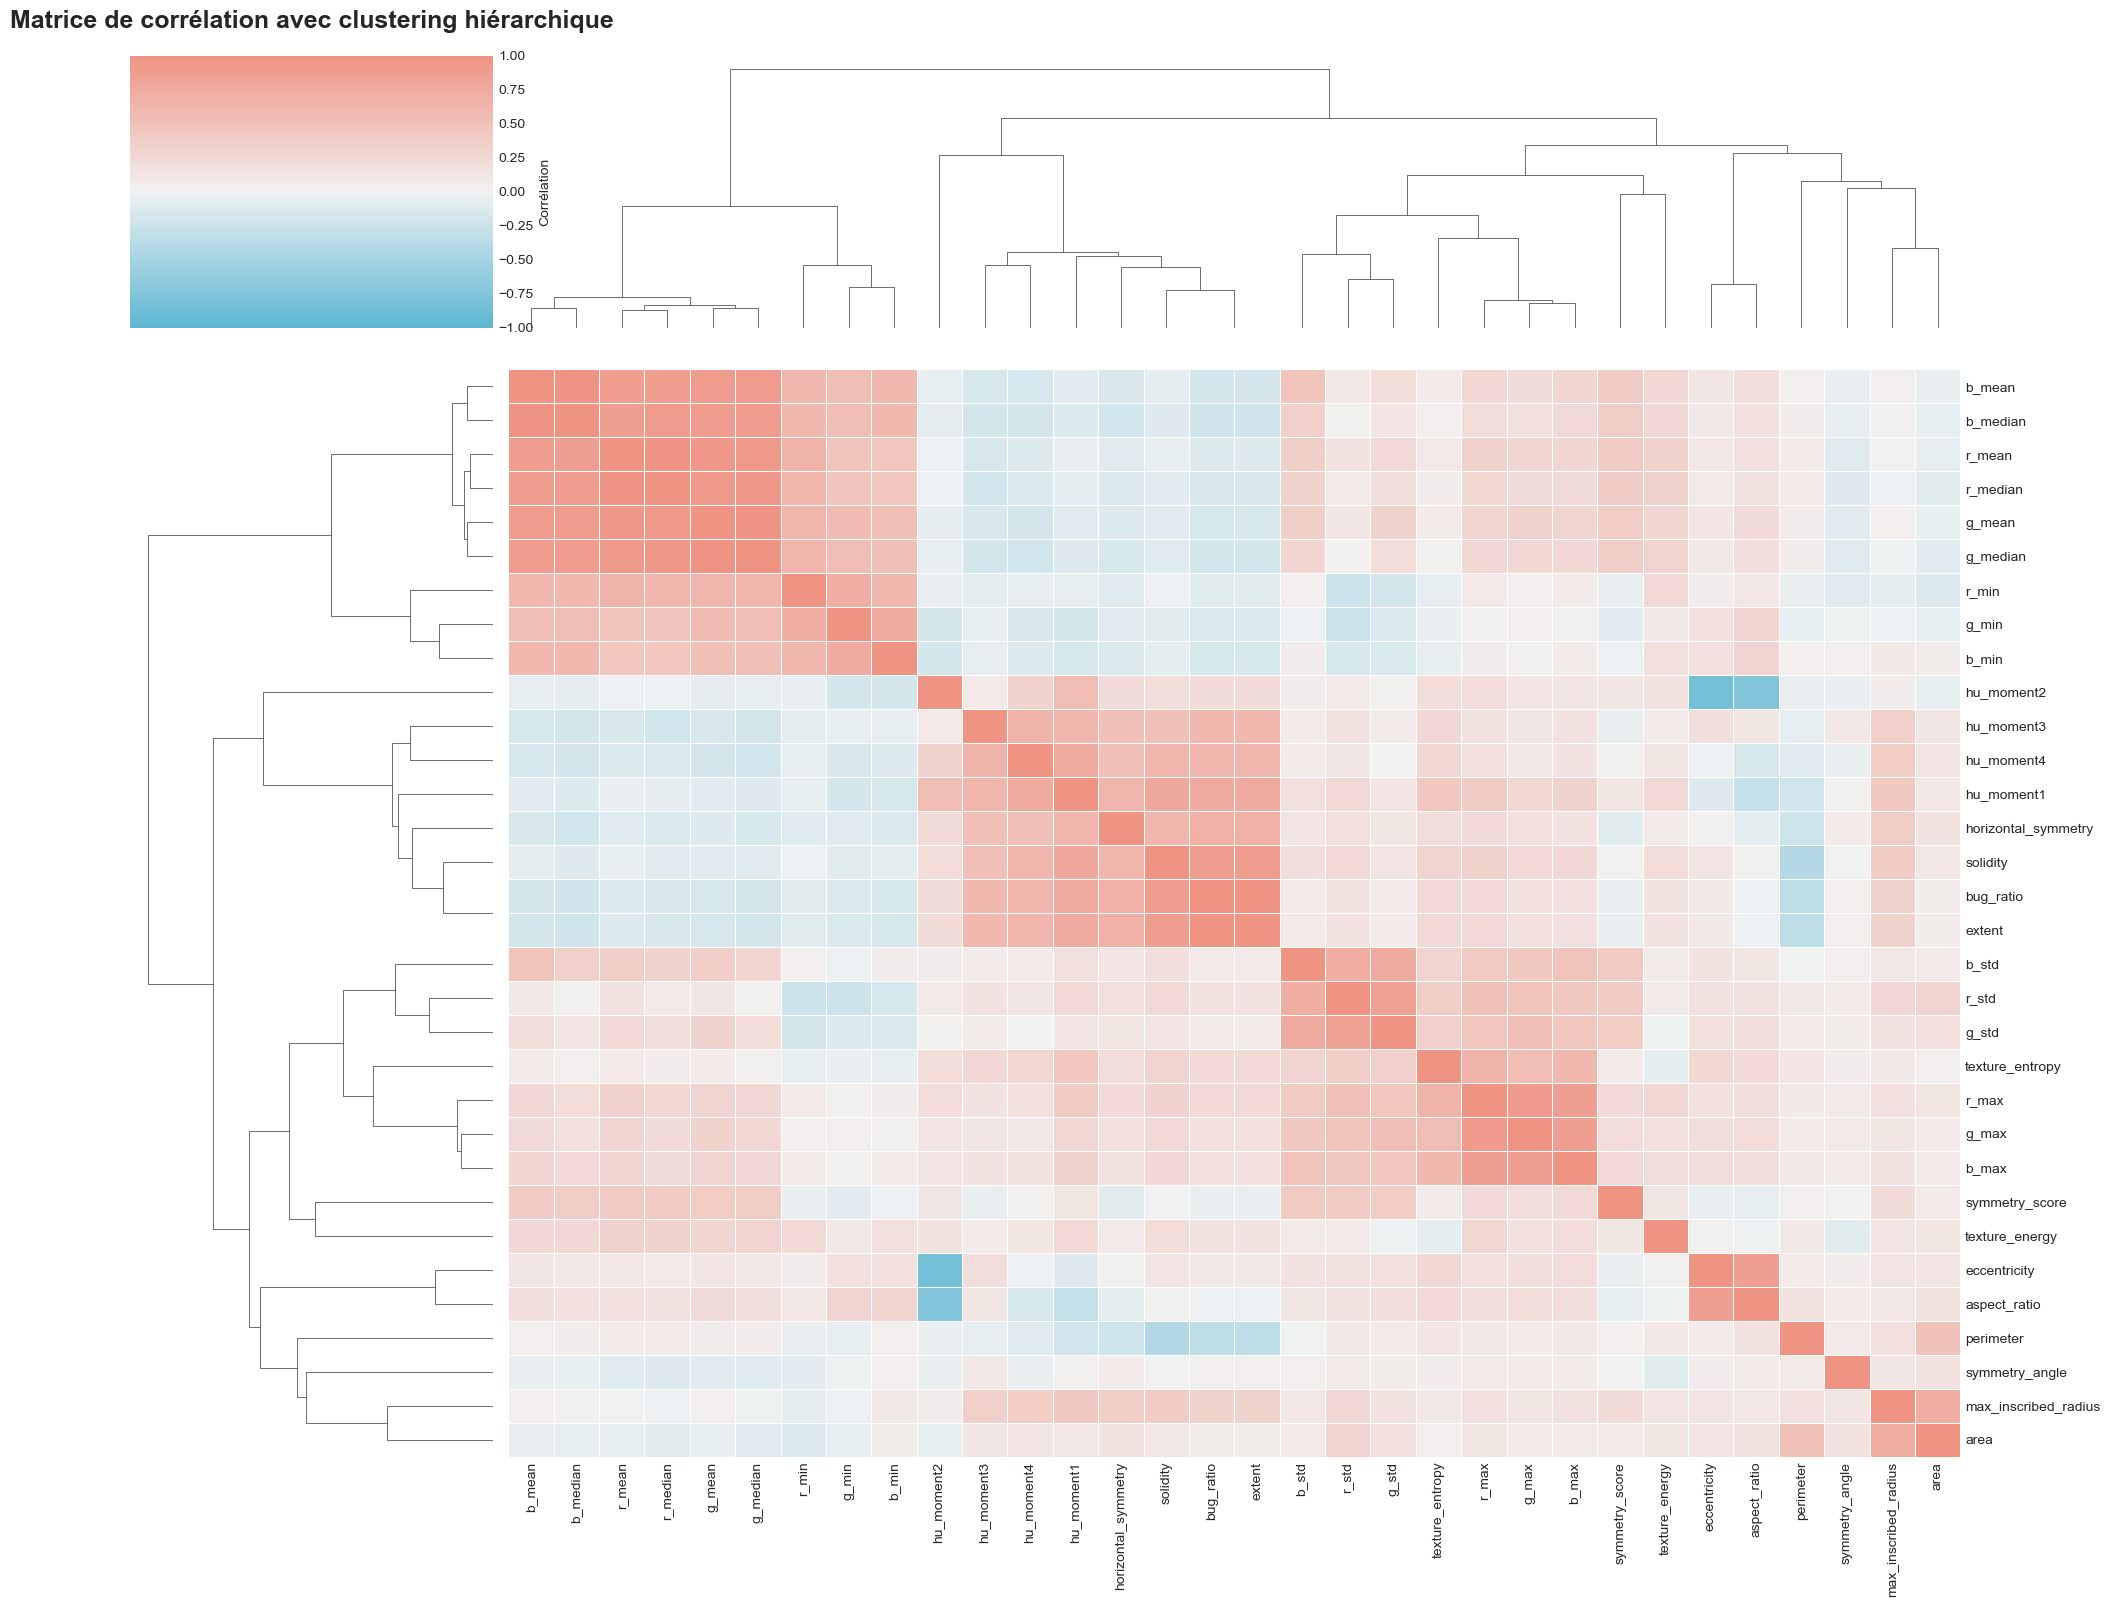


7. Création de la synthèse visuelle...


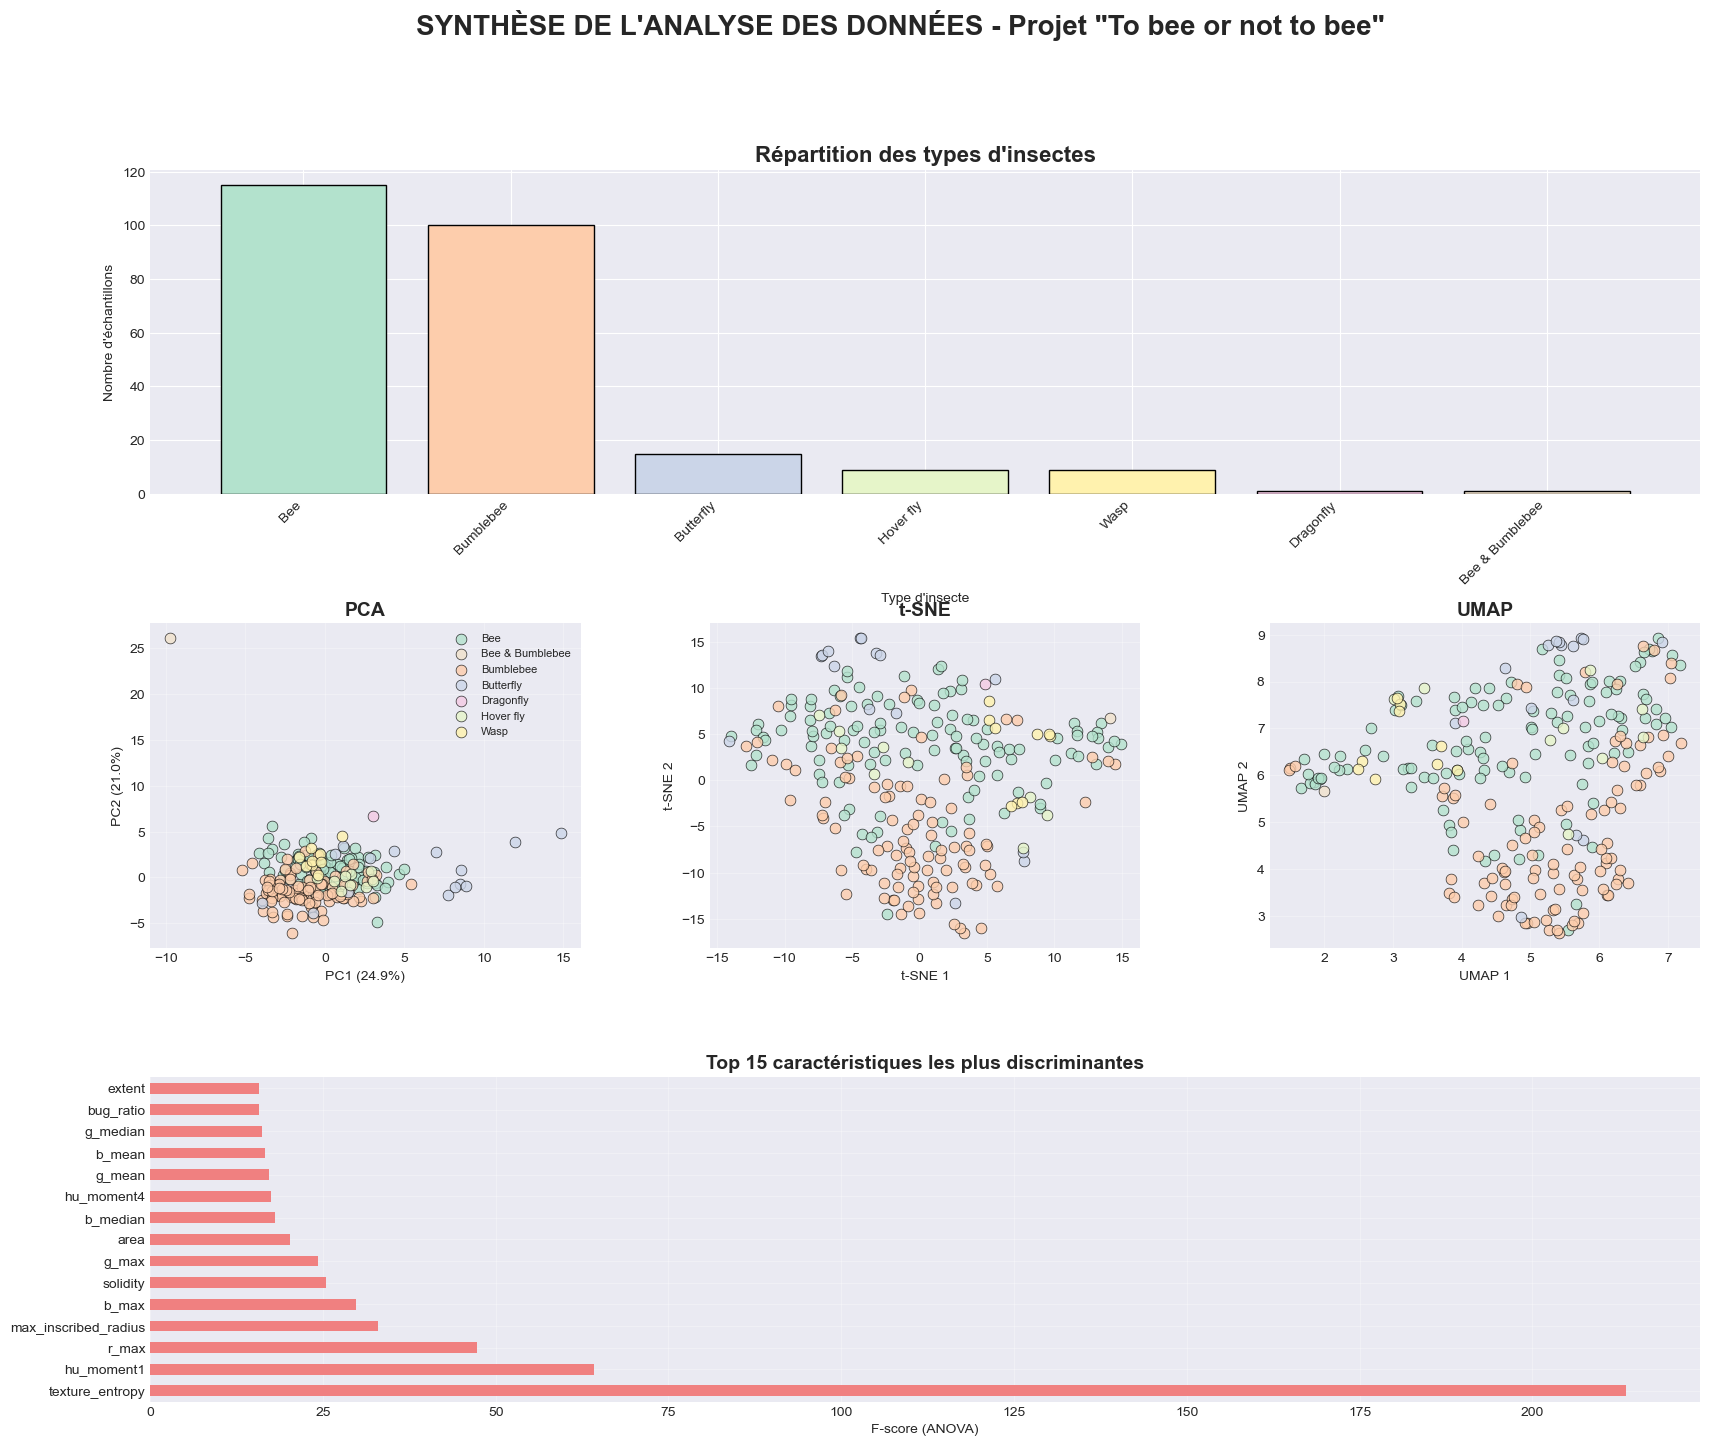


=== LÉGENDE DES COULEURS PASTEL ===
- Bee: #B3E2CD
- Bumblebee: #FDCDAC
- Butterfly: #CBD5E8
- Dragonfly: #F4CAE4
- Hover fly: #E6F5C9
- Wasp: #FFF2AE
- Bee & Bumblebee: #F1E2CC

ANALYSE TERMINÉE AVEC SUCCÈS

Fichiers générés dans le dossier 'visualization/':
- bug_type_distribution_enhanced.png : Répartition améliorée des classes
- species_distribution_enhanced.png : Distribution détaillée des espèces
- pca_analysis_complete.png : Analyse PCA complète
- feature_importance_pca.png : Importance des caractéristiques
- nonlinear_projections_comparison.png : Comparaison des projections non-linéaires
- key_features_violin_plots.png : Distribution des caractéristiques clés
- correlation_matrix_clustered.png : Matrice de corrélation avec clustering
- data_analysis_synthesis.png : Synthèse complète de l'analyse

Ces visualisations répondent aux exigences du projet:
✓ Répartition des types d'insectes et espèces
✓ Projection PCA en 2D avec analyse de variance
✓ Projections non-linéaires (t-SNE,

In [2]:
# Data Visualization Améliorée pour "To bee or not to bee"
# VERSION CORRIGÉE AVEC COULEURS PASTEL DISTINCTES

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
import umap
import warnings
warnings.filterwarnings('ignore')

# Configuration du style global
plt.style.use('seaborn-v0_8-darkgrid')

# Créer le dossier de visualisation
os.makedirs('visualization', exist_ok=True)

# ==================== DÉFINITION DE LA PALETTE DE COULEURS PASTEL DISTINCTES ====================
def get_bug_color_palette():
    return {
        'Bee': '#B3E2CD',
        'Bumblebee': '#FDCDAC',
        'Butterfly': '#CBD5E8',
        'Dragonfly': '#F4CAE4',
        'Hover fly': '#E6F5C9',
        'Wasp': '#FFF2AE',
        'Bee & Bumblebee': '#F1E2CC'
    }


# Charger les caractéristiques normalisées
features_df = pd.read_csv('features_normalized.csv')
print(f"Données chargées: {features_df.shape[0]} échantillons avec {features_df.shape[1]} caractéristiques")

# [Sections 1-6 identiques jusqu'à la section 7...]

# ==================== 1. RÉPARTITION DES CLASSES ====================
print("\n1. Analyse de la répartition des classes...")

# Créer une figure avec sous-graphiques pour une meilleure présentation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 1.1 Répartition des types d'insectes (diagramme en barres)
bug_type_counts = features_df['bug_type'].value_counts()
color_palette = get_bug_color_palette()

# Obtenir les couleurs dans l'ordre des counts
colors_bars = [color_palette.get(bug_type, '#808080') for bug_type in bug_type_counts.index]

# Diagramme en barres avec couleurs fixes
bars = ax1.bar(bug_type_counts.index, bug_type_counts.values, 
                color=colors_bars, edgecolor='black', linewidth=1.5)
ax1.set_title('Répartition des types d\'insectes', fontsize=16, fontweight='bold')
ax1.set_xlabel('Type d\'insecte', fontsize=12)
ax1.set_ylabel('Nombre d\'échantillons', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Ajouter les valeurs et pourcentages sur les barres
total = len(features_df)
for bar, count in zip(bars, bug_type_counts.values):
    height = bar.get_height()
    percentage = 100 * height / total
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{int(height)}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 1.2 Diagramme circulaire avec les mêmes couleurs
colors_pie = [color_palette.get(bug_type, '#808080') for bug_type in bug_type_counts.index]
wedges, texts, autotexts = ax2.pie(bug_type_counts.values, 
                                    labels=bug_type_counts.index, 
                                    autopct='%1.1f%%',
                                    colors=colors_pie,
                                    startangle=90,
                                    explode=[0.05 if count < 20 else 0 for count in bug_type_counts.values])
ax2.set_title('Proportion des types d\'insectes', fontsize=16, fontweight='bold')

# Améliorer la lisibilité
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('black')  # Changé en noir pour meilleure lisibilité sur pastel
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.savefig('visualization/bug_type_distribution_enhanced.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.3 Répartition détaillée des espèces
plt.figure(figsize=(16, 10))
species_counts = features_df['species'].value_counts()

# Créer un graphique horizontal pour mieux afficher les noms d'espèces
ax = sns.countplot(data=features_df, y='species', 
                   order=species_counts.index,
                   palette='pastel')  # Utiliser la palette pastel de seaborn

# Personnaliser l'apparence
ax.set_title('Répartition détaillée des espèces', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Nombre d\'échantillons', fontsize=14)
ax.set_ylabel('Espèce', fontsize=14)

# Ajouter les valeurs avec pourcentage
total = len(features_df)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    percentage = 100 * width / total
    ax.annotate(f'{int(width)} ({percentage:.1f}%)', 
                (width + 0.5, p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10)

# Ajouter une grille pour faciliter la lecture
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('visualization/species_distribution_enhanced.png', dpi=300, bbox_inches='tight')
plt.show()

# COMMENTAIRE pour le rapport
print("""
COMMENTAIRE - Répartition des classes:
- Déséquilibre important entre les classes : Bee (46%) et Bumblebee (40%) dominent largement
- Classes minoritaires : Butterfly (6%), Hover fly et Wasp (3.6% chacun)
- Classes très rares : Dragonfly et "Bee & Bumblebee" (0.4% chacun)
→ Ce déséquilibre pourrait affecter les performances des modèles de ML
""")

# ==================== 2. PCA - ANALYSE EN COMPOSANTES PRINCIPALES ====================
print("\n2. Analyse PCA...")

# Préparer les données
numeric_cols = [col for col in features_df.columns if col not in ['image_id', 'bug_type', 'species']]
X = features_df[numeric_cols].values
y = features_df['bug_type'].values
species = features_df['species'].values

# Appliquer PCA
pca = PCA()
X_pca_all = pca.fit_transform(X)

# Analyse de la variance expliquée
plt.figure(figsize=(15, 5))

# 2.1 Variance expliquée cumulée
plt.subplot(1, 3, 1)
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Nombre de composantes', fontsize=12)
plt.ylabel('Variance expliquée cumulée', fontsize=12)
plt.title('Variance expliquée cumulée', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 2.2 Scree plot
plt.subplot(1, 3, 2)
plt.bar(range(1, 11), pca.explained_variance_ratio_[:10])
plt.xlabel('Composante principale', fontsize=12)
plt.ylabel('Variance expliquée', fontsize=12)
plt.title('Scree Plot (10 premières composantes)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 2.3 Projection PCA 2D avec couleurs fixes
plt.subplot(1, 3, 3)
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X)

# Utiliser notre palette de couleurs
unique_types = np.unique(y)
for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=color, label=bug_type, alpha=0.8, s=80, 
                edgecolors='black', linewidth=0.5)

# Ajouter les centroïdes de chaque classe
for bug_type in unique_types:
    mask = y == bug_type
    if np.sum(mask) > 0:
        centroid = X_pca[mask].mean(axis=0)
        plt.annotate(bug_type, centroid, 
                    fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('Projection PCA 2D', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('visualization/pca_analysis_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"""
COMMENTAIRE - Analyse PCA:
- Les 2 premières composantes expliquent {pca_2d.explained_variance_ratio_.sum():.1%} de la variance
- Il faut {np.argmax(cumsum_var >= 0.95) + 1} composantes pour expliquer 95% de la variance
- La projection montre un chevauchement entre Bee et Bumblebee, suggérant des caractéristiques similaires
- Les classes minoritaires (Butterfly, Dragonfly) semblent mieux séparées
""")

# ==================== 3. VISUALISATION DES CARACTÉRISTIQUES LES PLUS DISCRIMINANTES ====================
print("\n3. Analyse des caractéristiques discriminantes...")

# Identifier les features les plus importantes via PCA
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings,
    columns=['PC1', 'PC2'],
    index=numeric_cols
)

# Calculer l'importance totale
loading_matrix['importance'] = np.sqrt(loading_matrix['PC1']**2 + loading_matrix['PC2']**2)
top_features = loading_matrix.nlargest(10, 'importance')

# Visualiser
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 3.1 Biplot des loadings
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Dessiner les vecteurs pour les top features avec couleurs pastel
pastel_colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_features)))
for idx, ((feature, row), color) in enumerate(zip(top_features.iterrows(), pastel_colors)):
    ax1.arrow(0, 0, row['PC1']/3, row['PC2']/3, 
              head_width=0.02, head_length=0.02, 
              fc=color, ec=color)
    ax1.annotate(feature, (row['PC1']/3, row['PC2']/3), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

ax1.set_xlabel('PC1 Loading', fontsize=12)
ax1.set_ylabel('PC2 Loading', fontsize=12)
ax1.set_title('Biplot - Contribution des caractéristiques', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 3.2 Importance des features
top_features['importance'].plot(kind='barh', ax=ax2, color='lightcoral')
ax2.set_xlabel('Importance (norme du vecteur loading)', fontsize=12)
ax2.set_title('Top 10 caractéristiques les plus importantes', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualization/feature_importance_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 4. PROJECTIONS NON-LINÉAIRES ====================
print("\n4. Calcul des projections non-linéaires...")

# Créer une grande figure pour comparer toutes les projections
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# 4.1 t-SNE avec différentes perplexités
print("Calcul t-SNE...")
perplexities = [5, 30]
for i, perp in enumerate(perplexities):
    ax = axes[0, i]
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp)
    X_tsne = tsne.fit_transform(X)
    
    for bug_type in unique_types:
        mask = y == bug_type
        color = color_palette.get(bug_type, '#808080')
        ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                  c=color, label=bug_type, alpha=0.8, s=80, 
                  edgecolors='black', linewidth=0.5)
    
    ax.set_title(f't-SNE (perplexity={perp})', fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)

# 4.2 UMAP
print("Calcul UMAP...")
ax = axes[1, 0]
reducer = umap.UMAP(random_state=42, n_neighbors=15)
X_umap = reducer.fit_transform(X)

for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax.scatter(X_umap[mask, 0], X_umap[mask, 1], 
              c=color, label=bug_type, alpha=0.8, s=80, 
              edgecolors='black', linewidth=0.5)

ax.set_title('UMAP (n_neighbors=15)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

# 4.3 Isomap
print("Calcul Isomap...")
ax = axes[1, 1]
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X)

for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax.scatter(X_isomap[mask, 0], X_isomap[mask, 1], 
              c=color, label=bug_type, alpha=0.8, s=80, 
              edgecolors='black', linewidth=0.5)

ax.set_title('Isomap (n_neighbors=10)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.suptitle('Comparaison des projections non-linéaires', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('visualization/nonlinear_projections_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("""
COMMENTAIRE - Projections non-linéaires:
- t-SNE (perplexity=5): Forme des clusters locaux très serrés, risque de sur-segmentation
- t-SNE (perplexity=30): Meilleure vue globale, Bee et Bumblebee forment un continuum
- UMAP: Excellente séparation des classes minoritaires (Butterfly, Dragonfly)
- Isomap: Préserve mieux la structure globale, montre la proximité Bee/Bumblebee
→ Les méthodes non-linéaires confirment la difficulté à séparer Bee et Bumblebee
""")

# ==================== 5. ANALYSE APPROFONDIE PAR CARACTÉRISTIQUE ====================
print("\n5. Analyse détaillée des caractéristiques clés...")

# Sélectionner les caractéristiques les plus discriminantes
key_features = ['bug_ratio', 'eccentricity', 'symmetry_angle', 'r_mean', 'g_mean', 'b_mean']

# Créer une matrice de violin plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    ax = axes[i]
    
    # Créer les données pour chaque type
    data_list = []
    positions = []
    colors_violin = []
    
    for j, bug_type in enumerate(unique_types):
        data = features_df[features_df['bug_type'] == bug_type][feature].values
        if len(data) > 0:
            data_list.append(data)
            positions.append(j)
            colors_violin.append(color_palette.get(bug_type, '#808080'))
    
    # Violin plot
    if data_list:
        parts = ax.violinplot(data_list, positions=positions,
                             showmeans=True, showmedians=True)
        
        # Personnaliser les couleurs
        for pc, color in zip(parts['bodies'], colors_violin):
            pc.set_facecolor(color)
            pc.set_alpha(0.8)
            pc.set_edgecolor('black')
        
        # Couleurs pour les autres éléments
        for partname in ['cbars', 'cmins', 'cmaxes', 'cmeans', 'cmedians']:
            if partname in parts:
                parts[partname].set_color('black')
                parts[partname].set_linewidth(1.5)
    
    ax.set_xticks(range(len(unique_types)))
    ax.set_xticklabels(unique_types, rotation=45, ha='right')
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Distribution des caractéristiques clés par type d\'insecte', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('visualization/key_features_violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 6. MATRICE DE CORRÉLATION AMÉLIORÉE ====================
print("\n6. Analyse des corrélations...")

# Calculer la matrice de corrélation
correlation_matrix = features_df[numeric_cols].corr()

# Visualisation améliorée
plt.figure(figsize=(20, 16))

# Utiliser une palette divergente pastel
cmap = sns.diverging_palette(220, 20, as_cmap=True, l=70)  # l=70 pour plus pastel

# Heatmap avec dendrogramme
sns.clustermap(correlation_matrix, 
               mask=None,
               cmap=cmap, 
               vmin=-1, vmax=1,
               center=0,
               square=True,
               linewidths=0.5,
               cbar_kws={"shrink": 0.8, "label": "Corrélation"},
               figsize=(20, 16))

plt.title('Matrice de corrélation avec clustering hiérarchique', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('visualization/correlation_matrix_clustered.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 7. SYNTHÈSE FINALE (CORRIGÉE) ====================
print("\n7. Création de la synthèse visuelle...")

# Calculer d'abord les features importantes
from sklearn.feature_selection import f_classif
feature_importance_df = pd.DataFrame()
for feature in numeric_cols:
    f_score, _ = f_classif(features_df[[feature]].values, y)
    feature_importance_df.loc[feature, 'F-score'] = f_score[0]

top_15_features = feature_importance_df.nlargest(15, 'F-score')

# Créer une figure de synthèse avec la bonne taille
fig = plt.figure(figsize=(20, 16))

# Définir la grille correctement
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)

# 7.1 Répartition des classes (ligne du haut, toute la largeur)
ax1 = fig.add_subplot(gs[0, :])
colors_summary = [color_palette.get(bug_type, '#808080') for bug_type in bug_type_counts.index]
bars = ax1.bar(bug_type_counts.index, bug_type_counts.values, color=colors_summary, edgecolor='black')
ax1.set_title('Répartition des types d\'insectes', fontsize=16, fontweight='bold')
ax1.set_ylabel('Nombre d\'échantillons')
ax1.set_xlabel('Type d\'insecte')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 7.2 PCA
ax2 = fig.add_subplot(gs[1, 0])
for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=color, label=bug_type, alpha=0.8, s=60, edgecolors='black', linewidth=0.5)
ax2.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
ax2.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
ax2.set_title('PCA', fontsize=14, fontweight='bold')
ax2.legend(fontsize=8, loc='best')
ax2.grid(True, alpha=0.3)

# 7.3 t-SNE (on utilise X_tsne déjà calculé)
ax3 = fig.add_subplot(gs[1, 1])
for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax3.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                c=color, label=bug_type, alpha=0.8, s=60, edgecolors='black', linewidth=0.5)
ax3.set_title('t-SNE', fontsize=14, fontweight='bold')
ax3.set_xlabel('t-SNE 1')
ax3.set_ylabel('t-SNE 2')
ax3.grid(True, alpha=0.3)

# 7.4 UMAP
ax4 = fig.add_subplot(gs[1, 2])
for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax4.scatter(X_umap[mask, 0], X_umap[mask, 1], 
                c=color, label=bug_type, alpha=0.8, s=60, edgecolors='black', linewidth=0.5)
ax4.set_title('UMAP', fontsize=14, fontweight='bold')
ax4.set_xlabel('UMAP 1')
ax4.set_ylabel('UMAP 2')
ax4.grid(True, alpha=0.3)

# 7.5 Features importantes (ligne du bas, toute la largeur)
ax5 = fig.add_subplot(gs[2, :])
top_15_features.plot(kind='barh', ax=ax5, color='lightcoral', legend=False)
ax5.set_xlabel('F-score (ANOVA)')
ax5.set_title('Top 15 caractéristiques les plus discriminantes', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)

plt.suptitle('SYNTHÈSE DE L\'ANALYSE DES DONNÉES - Projet "To bee or not to bee"', 
             fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig('visualization/data_analysis_synthesis.png', dpi=300, bbox_inches='tight')
plt.show()

# Légende des couleurs
print("\n=== LÉGENDE DES COULEURS PASTEL ===")
for bug_type, color in color_palette.items():
    if bug_type in unique_types:
        print(f"- {bug_type}: {color}")

print("\n" + "="*80)
print("ANALYSE TERMINÉE AVEC SUCCÈS")
print("="*80)
print(f"""
Fichiers générés dans le dossier 'visualization/':
- bug_type_distribution_enhanced.png : Répartition améliorée des classes
- species_distribution_enhanced.png : Distribution détaillée des espèces
- pca_analysis_complete.png : Analyse PCA complète
- feature_importance_pca.png : Importance des caractéristiques
- nonlinear_projections_comparison.png : Comparaison des projections non-linéaires
- key_features_violin_plots.png : Distribution des caractéristiques clés
- correlation_matrix_clustered.png : Matrice de corrélation avec clustering
- data_analysis_synthesis.png : Synthèse complète de l'analyse

Ces visualisations répondent aux exigences du projet:
✓ Répartition des types d'insectes et espèces
✓ Projection PCA en 2D avec analyse de variance
✓ Projections non-linéaires (t-SNE, UMAP, Isomap)
✓ Commentaires significatifs pour chaque visualisation
""")